In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "brain_dead_emotion_detection",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2179 files belonging to 2 classes.


In [5]:
training=tf.keras.preprocessing.image_dataset_from_directory(
    "brain_dead_emotion_detection/Train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 1810 files belonging to 4 classes.


In [7]:
testing=tf.keras.preprocessing.image_dataset_from_directory(
    "brain_dead_emotion_detection/Test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 369 files belonging to 4 classes.


In [8]:
class_names=training.class_names
class_names

['angry', 'happy', 'neutral', 'sad']

In [9]:
for image_batch,label_batch in training.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 2, 0, 1, 3, 2, 2, 1, 0, 0, 1, 3, 3, 0, 0, 1, 1, 3, 0, 3, 2, 3,
       0, 3, 3, 2, 1, 2, 2, 0, 2, 1])>>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


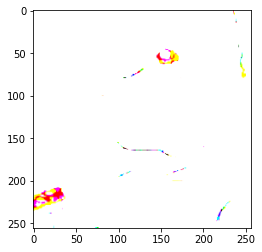

In [10]:
for image_batch,label_batch in training.take(1):
    plt.imshow(image_batch[0].numpy())

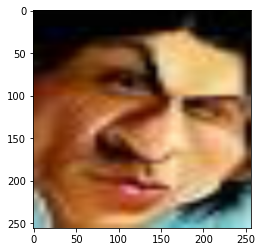

In [11]:
for image_batch,label_batch in training.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    

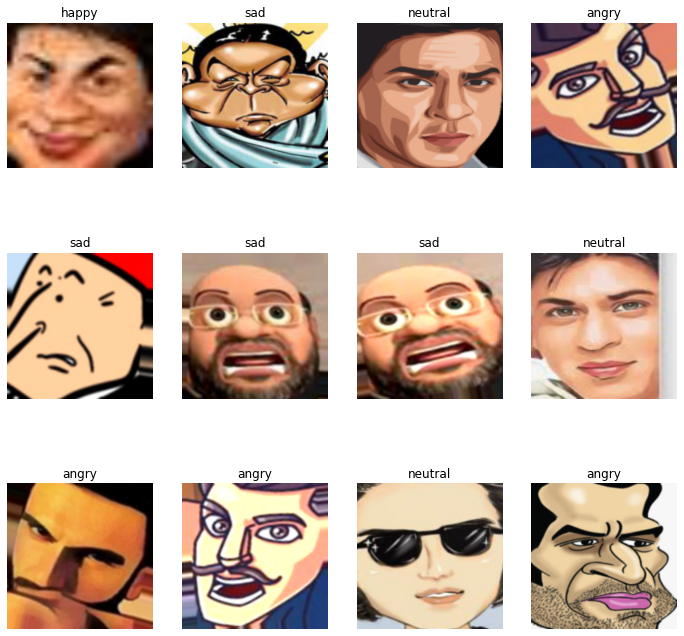

In [12]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in training.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
val_ds=testing.take(5)
len(val_ds)

5

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    training,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
12/12 [==============================] - 25s 2s/step - loss: 1.3677 - accuracy: 0.3415 - val_loss: 1.3436 - val_accuracy: 0.3500
Epoch 2/20
12/12 [==============================] - 25s 2s/step - loss: 1.3530 - accuracy: 0.3360 - val_loss: 1.2852 - val_accuracy: 0.3938
Epoch 3/20
12/12 [==============================] - 25s 2s/step - loss: 1.2538 - accuracy: 0.4526 - val_loss: 1.2241 - val_accuracy: 0.4500
Epoch 4/20
12/12 [==============================] - 25s 2s/step - loss: 1.2277 - accuracy: 0.4444 - val_loss: 1.0492 - val_accuracy: 0.6062
Epoch 5/20
12/12 [==============================] - 25s 2s/step - loss: 1.1116 - accuracy: 0.5366 - val_loss: 1.0331 - val_accuracy: 0.5750
Epoch 6/20
12/12 [==============================] - 25s 2s/step - loss: 0.9952 - accuracy: 0.6043 - val_loss: 0.8028 - val_accuracy: 0.6875
Epoch 7/20
12/12 [==============================] - 25s 2s/step - loss: 0.9400 - accuracy: 0.6369 - val_loss: 0.8400 - val_accuracy: 0.6562
Epoch 8/20
12/12 [==

In [34]:
scores = model.evaluate(testing)

12/12 [==============================] - 6s 506ms/step - loss: 0.0801 - accuracy: 0.9837


In [35]:
scores

[0.08013942837715149, 0.9837398529052734]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 12}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (5,) and (20,)

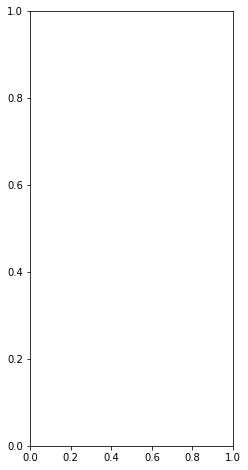

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

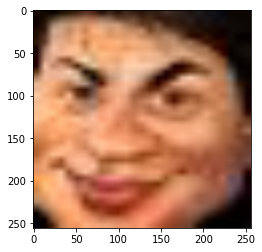

In [41]:
for images_batch, labels_batch in testing.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))


first image to predict
actual label: neutral


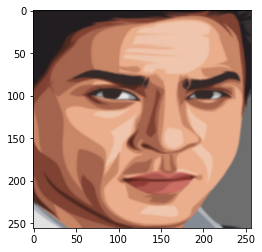

In [42]:
for images_batch, labels_batch in testing.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

first image to predict
actual label: angry
[8.6873072e-01 1.2039125e-01 1.0847991e-02 3.0044555e-05]


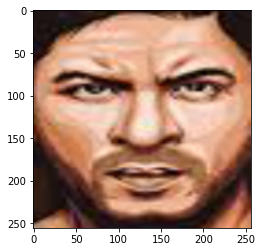

In [43]:
for images_batch, labels_batch in testing.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])

first image to predict
actual label: angry
predicted label: angry


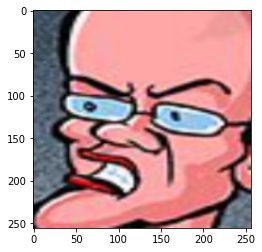

In [44]:
import numpy as np
for images_batch, labels_batch in testing.take(1):
    
    first_image = images_batch[18].numpy().astype('uint8')
    first_label = labels_batch[18].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[18])])

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

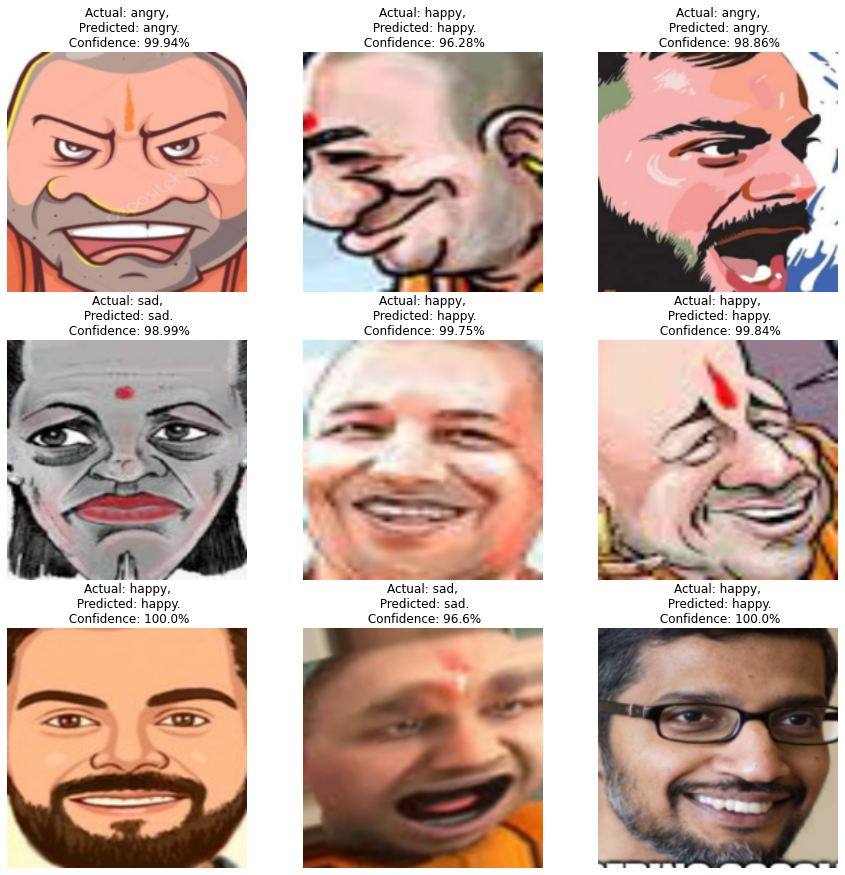

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in testing.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
